In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

# For loop

In [125]:
selected_files = np.array([1,3,4,6,7,8,9,10])

file_paths = [f"cumulative_rewards/cumulative_rewards_run_{i}.npy" for i in selected_files]
cumulative_rewards = [np.load(path) for path in file_paths]

In [3]:
def rolling_average(arr, ROLLING_WINDOW_SIZE):
    cumsum = arr.cumsum()
    cumsum[ROLLING_WINDOW_SIZE:] -= cumsum[:-ROLLING_WINDOW_SIZE]
    return np.array((cumsum[ROLLING_WINDOW_SIZE - 1:] / ROLLING_WINDOW_SIZE))

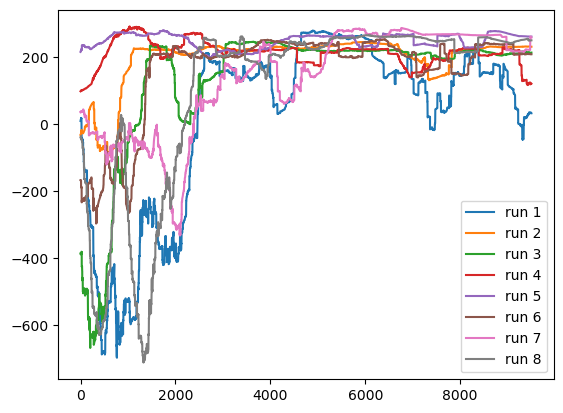

In [130]:
ROLLING_WINDOW_SIZE = 500
cumreward1 = rolling_average(cumulative_rewards[0], ROLLING_WINDOW_SIZE)
epochs = np.arange(len(cumreward1))

for i in range(len(selected_files)):
    plt.plot(epochs, rolling_average(cumulative_rewards[i],ROLLING_WINDOW_SIZE), label=f'run {i+1}')
plt.legend(loc = 'lower right')

In [4]:
def rolling_average(arr, ROLLING_WINDOW_SIZE):
    cumsum = arr.cumsum()
    cumsum[ROLLING_WINDOW_SIZE:] -= cumsum[:-ROLLING_WINDOW_SIZE]
    return np.array(cumsum[ROLLING_WINDOW_SIZE - 1:] / ROLLING_WINDOW_SIZE)

def rolling_avg_std(data, ROLLING_WINDOW_SIZE):
    """
    Computes the rolling standard deviation for the rolling average array.

    Parameters:
        data (numpy.ndarray): A 2D array where rows correspond to individual runs.
        ROLLING_WINDOW_SIZE (int): Size of the rolling window.

    Returns:
        numpy.ndarray: Rolling standard deviation of the rolling average.
    """
    # Step 1: Compute the rolling averages for each run
    rolling_averages = np.array([rolling_average(run, ROLLING_WINDOW_SIZE) for run in data])

    # Step 2: Compute the standard deviation across runs for each time step in the rolling averages
    rolling_std_values = np.std(rolling_averages, axis=0)
    
    return rolling_std_values

def plot_avg_std(mean, std):
    iteration = np.arange(len(mean))
    plt.figure(figsize=(7, 6))

    # Plot the mean
    plt.plot(iteration, mean, label='Mean', color='blue', lw=2)

    # Plot the standard deviation as a shaded region
    plt.fill_between(iteration, mean - std, mean + std, color='blue', alpha=0.2, label='Standard Deviation')

    # Labels and legend
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Cumulative Reward', fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(fontsize=14, loc='lower right')
    plt.minorticks_on()
    plt.tick_params(axis='both', which='minor', length=4, color='gray', labelsize=14)
    plt.tick_params(axis='both', which='major', length=6, color='black', labelsize=14)
    plt.tick_params(top=True, right=True, direction='in', length=6)
    plt.tick_params(which='minor', top=True, right=True, direction='in', length=4)
    plt.savefig('sd_corrected_cumrewardgraph.pdf')
    plt.show()
    

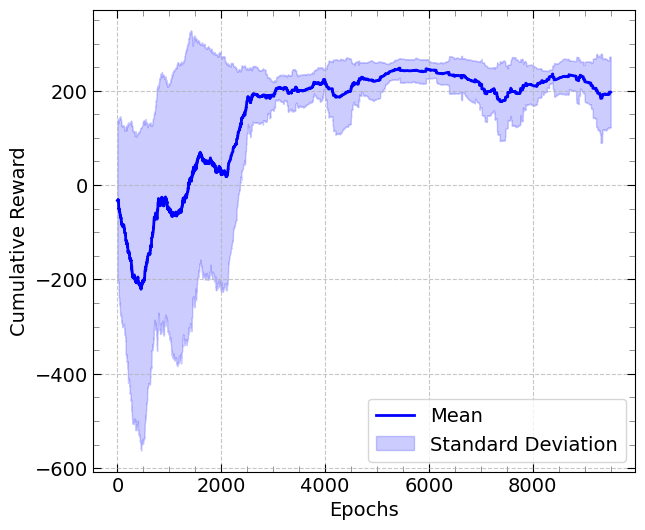

In [134]:
cumulative_rewards_array = np.array(cumulative_rewards)


rolling_avg = np.mean(np.array([rolling_average(run, ROLLING_WINDOW_SIZE) for run in cumulative_rewards_array]), axis=0)
rolling_std = rolling_avg_std(cumulative_rewards_array, ROLLING_WINDOW_SIZE)
plot_avg_std(rolling_avg, rolling_std)

# **100K epochs baby**

In [166]:
# selected_files = np.array([1,2,3,4,5,6,7,9,12,13,14,15])
selected_files = np.array([1,2,3,4,5,6,7,8,9,10,12,13,14,15])

file_paths = [f"cumulative_rewards/100Kepochsbaby_cumrewards_run_{i}.npy" for i in selected_files]
cumulative_rewards = [np.load(path) for path in file_paths]

cumulative_rewards_arr = np.array(cumulative_rewards)
cumulative_rewards_arr.shape

(14, 100000)

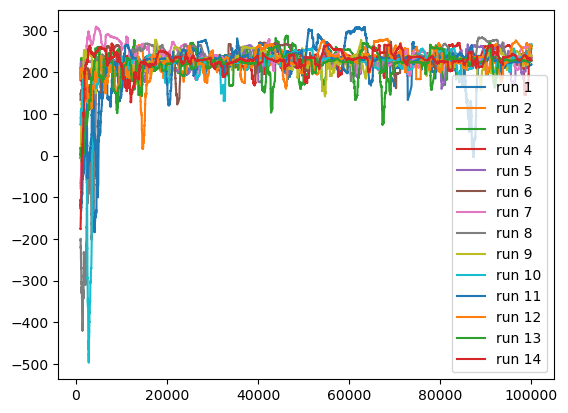

In [167]:
ROLLING_WINDOW_SIZE = 1000
epochs = np.arange(cumulative_rewards_arr.shape[1])[ROLLING_WINDOW_SIZE-1:]

for i in range(cumulative_rewards_arr.shape[0]):
    plt.plot(epochs, rolling_average(cumulative_rewards[i],ROLLING_WINDOW_SIZE), label=f'run {i+1}')
plt.legend(loc = 'lower right')

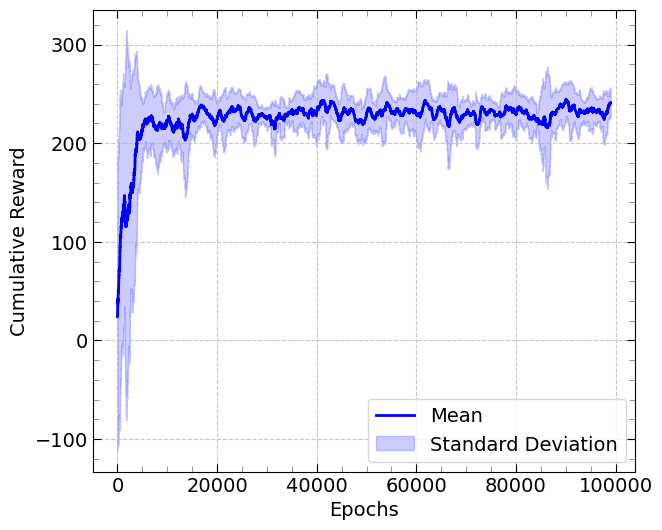

In [168]:
cumulative_rewards_array = np.array(cumulative_rewards)
ROLLING_WINDOW_SIZE = 1000

rolling_avg = np.mean(np.array([rolling_average(run, ROLLING_WINDOW_SIZE) for run in cumulative_rewards_array]), axis=0)
rolling_std = rolling_avg_std(cumulative_rewards_array, ROLLING_WINDOW_SIZE)
plot_avg_std(rolling_avg, rolling_std)

# with angle reward func

In [169]:
# selected_files = np.array([1,2,3,4,5,6,7,9,12,13,14,15])
selected_files = np.array([1,2,3,4,5,6,7,8])

file_paths = [f"cumulative_rewards/cumulative_rewards_run_{i}.npy" for i in selected_files]
cumulative_rewards = [np.load(path) for path in file_paths]

cumulative_rewards_arr = np.array(cumulative_rewards)
cumulative_rewards_arr.shape

(8, 10000)

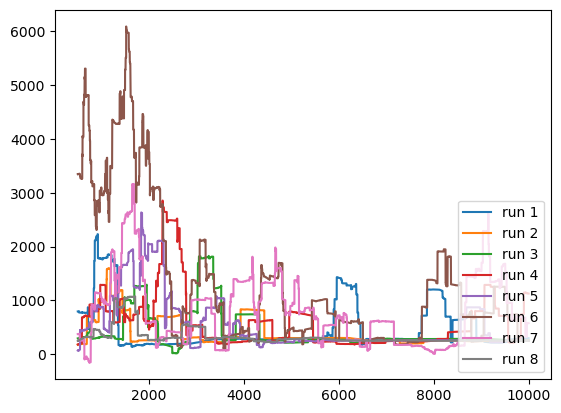

In [170]:
ROLLING_WINDOW_SIZE = 500
epochs = np.arange(cumulative_rewards_arr.shape[1])[ROLLING_WINDOW_SIZE-1:]

for i in range(cumulative_rewards_arr.shape[0]):
    plt.plot(epochs, rolling_average(cumulative_rewards[i],ROLLING_WINDOW_SIZE), label=f'run {i+1}')
plt.legend(loc = 'lower right')

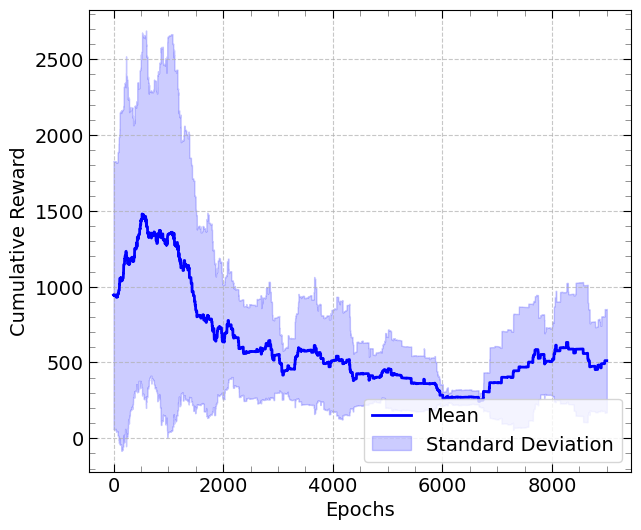

In [174]:
cumulative_rewards_arr = np.array(cumulative_rewards)
ROLLING_WINDOW_SIZE = 1000

rolling_avg = np.mean(np.array([rolling_average(run, ROLLING_WINDOW_SIZE) for run in cumulative_rewards_arr]), axis=0)
rolling_std = rolling_avg_std(cumulative_rewards_arr, ROLLING_WINDOW_SIZE)
plot_avg_std(rolling_avg, rolling_std)

# no for loop

In [80]:
file_paths = [f"cumulative_rewards/cumulative_rewards_{i}.npy" for i in range(1, 10)]
cumulative_rewards = [np.load(path) for path in file_paths]

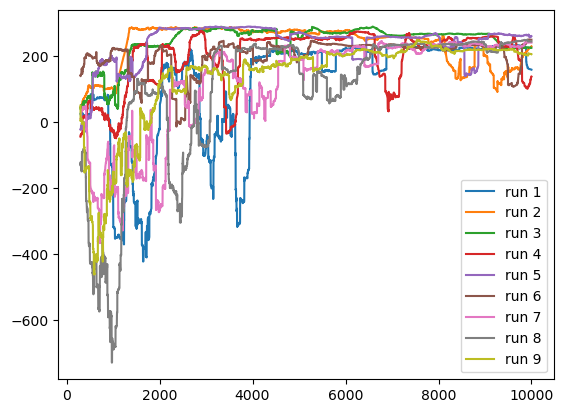

In [81]:
ROLLING_WINDOW_SIZE = 300
cumrewards1 = rolling_average(cumulative_rewards[0], ROLLING_WINDOW_SIZE)
epochs = np.arange(len(cumreward1))[ROLLING_WINDOW_SIZE-1:]

for i in range(9):
    plt.plot(epochs, rolling_average(cumulative_rewards[i],300), label=f'run {i+1}')

plt.legend()

In [82]:
cumulative_rewards_array = np.array(cumulative_rewards)

# Now you can access the .size attribute
print(cumulative_rewards_array.shape)

(9, 10000)


In [83]:
rolling_average(cumulative_rewards_array.mean(axis=0), 300)


array([ 12.67535465,   7.67291073,   7.0389786 , ..., 216.27442104,
       216.32193917, 216.23077272])

In [183]:
def rolling_average(arr, ROLLING_WINDOW_SIZE):
    cumsum = arr.cumsum()
    cumsum[ROLLING_WINDOW_SIZE:] -= cumsum[:-ROLLING_WINDOW_SIZE]
    return np.array(cumsum[ROLLING_WINDOW_SIZE - 1:] / ROLLING_WINDOW_SIZE)

def rolling_avg_std(data, ROLLING_WINDOW_SIZE):
    """
    Computes the rolling standard deviation for the rolling average array.

    Parameters:
        data (numpy.ndarray): A 2D array where rows correspond to individual runs.
        ROLLING_WINDOW_SIZE (int): Size of the rolling window.

    Returns:
        numpy.ndarray: Rolling standard deviation of the rolling average.
    """
    # Step 1: Compute the rolling averages for each run
    rolling_averages = np.array([rolling_average(run, ROLLING_WINDOW_SIZE) for run in data])

    # Step 2: Compute the standard deviation across runs for each time step in the rolling averages
    rolling_std_values = np.std(rolling_averages, axis=0)
    
    return rolling_std_values

def plot_avg_std(mean, std):
    iteration = np.arange(len(mean))
    plt.figure(figsize=(8, 6))

    # Plot the mean
    plt.plot(iteration, mean, label='Mean', color='blue', lw=2)

    # Plot the standard deviation as a shaded region
    plt.fill_between(iteration, mean - std, mean + std, color='blue', alpha=0.2, label='Standard Deviation')

    # Labels and legend
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Cumulative Reward', fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(fontsize=14, loc='upper left')
    plt.minorticks_on()
    plt.tick_params(axis='both', which='minor', length=4, color='gray', labelsize=14)
    plt.tick_params(axis='both', which='major', length=6, color='black', labelsize=14)
    plt.tick_params(top=True, right=True, direction='in', length=6)
    plt.tick_params(which='minor', top=True, right=True, direction='in', length=4)
    plt.savefig('sd_corrected_cumrewardgraph.pdf')
    plt.show()
    

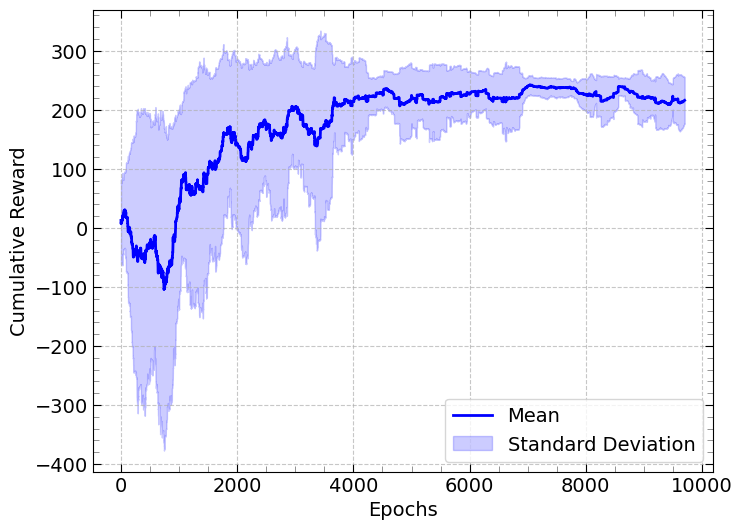

In [96]:
rolling_avg = np.mean(np.array([rolling_average(run, ROLLING_WINDOW_SIZE) for run in cumulative_rewards_array]), axis=0)
rolling_std = rolling_avg_std(cumulative_rewards_array, ROLLING_WINDOW_SIZE)
plot_avg_std(rolling_avg, rolling_std)

# 100K epochs + angle bit of reward func


In [176]:
selected_files = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13])

file_paths = [f"cumulative_rewards/cumulative_rewards_run_{i}.npy" for i in selected_files]
cumulative_rewards = [np.load(path) for path in file_paths]
cumulative_rewards_np = np.array(cumulative_rewards)

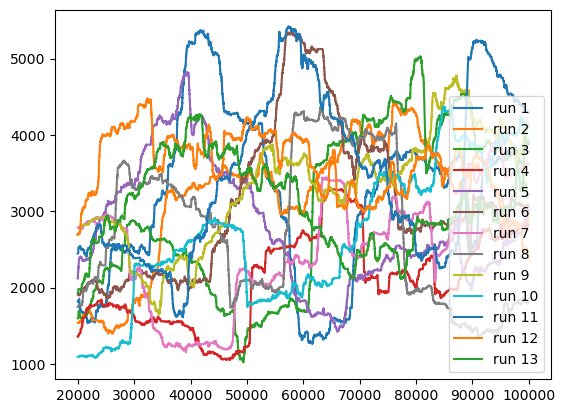

In [180]:
ROLLING_WINDOW_SIZE = 20000
epochs = np.arange(cumulative_rewards_np.shape[1])[ROLLING_WINDOW_SIZE-1:]

for i in range(cumulative_rewards_np.shape[0]):
    plt.plot(epochs, rolling_average(cumulative_rewards_np[i],ROLLING_WINDOW_SIZE), label=f'run {i+1}')
plt.legend(loc = 'lower right')

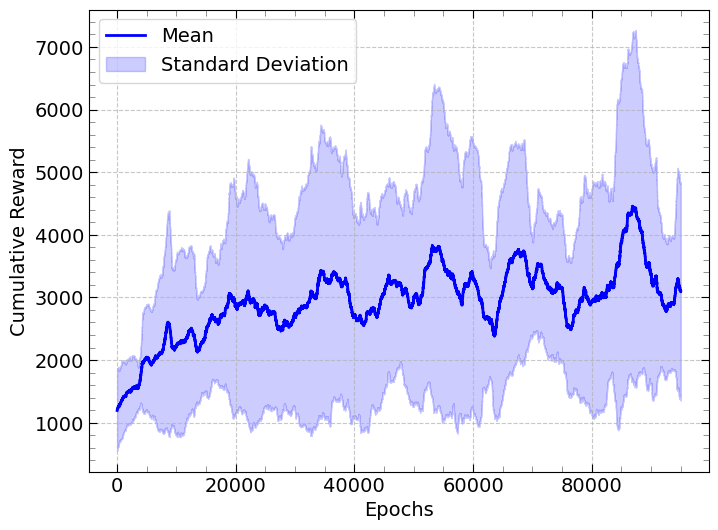

In [184]:
cumulative_rewards_arr = np.array(cumulative_rewards)
ROLLING_WINDOW_SIZE = 5000

rolling_avg = np.mean(np.array([rolling_average(run, ROLLING_WINDOW_SIZE) for run in cumulative_rewards_arr]), axis=0)
rolling_std = rolling_avg_std(cumulative_rewards_arr, ROLLING_WINDOW_SIZE)
plot_avg_std(rolling_avg, rolling_std)

# 50K epochs with improved angle reward

In [5]:
selected_files = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13])

file_paths = [f"cumulative_rewards/cumulative_rewards_run_{i}.npy" for i in selected_files]
cumulative_rewards = [np.load(path) for path in file_paths]
cumulative_rewards_nparray = np.array(cumulative_rewards)

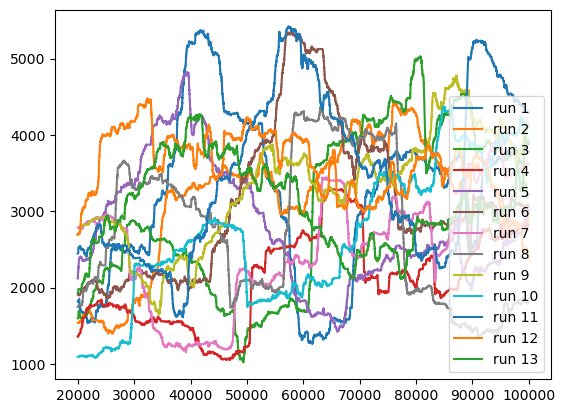

In [7]:
ROLLING_WINDOW_SIZE = 20000
epochs = np.arange(cumulative_rewards_nparray.shape[1])[ROLLING_WINDOW_SIZE-1:]

for i in range(cumulative_rewards_nparray.shape[0]):
    plt.plot(epochs, rolling_average(cumulative_rewards_nparray[i],ROLLING_WINDOW_SIZE), label=f'run {i+1}')
plt.legend(loc = 'lower right')

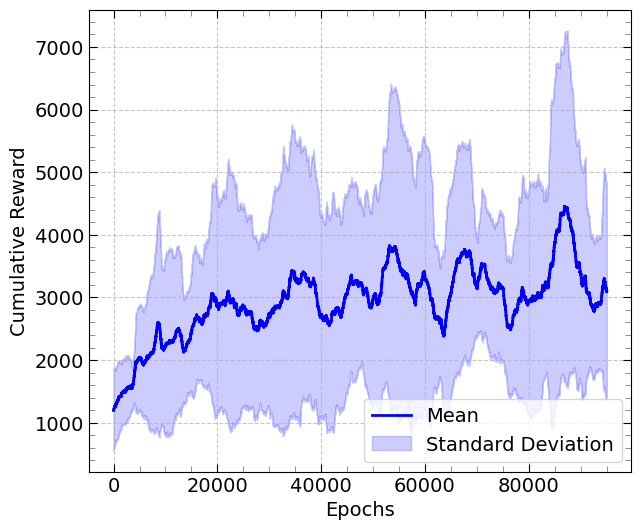

In [8]:
cumulative_rewards_nparray = np.array(cumulative_rewards)
ROLLING_WINDOW_SIZE = 5000

rolling_avg = np.mean(np.array([rolling_average(run, ROLLING_WINDOW_SIZE) for run in cumulative_rewards_nparray]), axis=0)
rolling_std = rolling_avg_std(cumulative_rewards_nparray, ROLLING_WINDOW_SIZE)
plot_avg_std(rolling_avg, rolling_std)